<a href="https://colab.research.google.com/github/tushargupta14/StockPricePredictionBigData/blob/main/notebooks/StockPriceLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
! pip install yfinance 

     |████████████████████████████████| 6.3 MB 5.9 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [4]:
import pandas as pd
import yfinance as yf
data_stock = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "AAPL",

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "5y",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

[*********************100%***********************]  1 of 1 completed


In [5]:
data_stock.info()
data_aapl = data_stock.loc[~data_stock.index.duplicated(keep='last')]
data_aapl.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2016-12-12 to 2021-12-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1259 non-null   float64
 1   High    1259 non-null   float64
 2   Low     1259 non-null   float64
 3   Close   1259 non-null   float64
 4   Volume  1259 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [6]:
print(data_aapl.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2016-12-12 to 2021-12-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1259 non-null   float64
 1   High    1259 non-null   float64
 2   Low     1259 non-null   float64
 3   Close   1259 non-null   float64
 4   Volume  1259 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB
None


In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
#from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [8]:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    data_aapl[column_name] = data_aapl['Close'].rolling(ma).mean()

In [9]:
data = data_aapl.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .80 ))

training_data_len

1008

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.20602178],
       [0.21291   ],
       [0.21291   ],
       ...,
       [0.44693508],
       [0.44499312],
       [0.46325483]])

In [11]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.20602178, 0.21291   , 0.21291   , 0.21520594, 0.21575265,
       0.21819449, 0.21932429, 0.21972517, 0.21691894, 0.2177572 ,
       0.22045414, 0.21863179, 0.21852255, 0.21520594, 0.2164087 ,
       0.21593485, 0.21808517, 0.22282307, 0.22675907, 0.22719648,
       0.22952889, 0.22770665, 0.2269413 , 0.23044   , 0.23040359,
       0.22963821, 0.23044   , 0.23073159, 0.23033074, 0.23729167,
       0.23751037, 0.23754684, 0.23638055, 0.23536008, 0.26232942,
       0.26152766, 0.26353221, 0.26794194, 0.27246126, 0.27431984,
       0.27622624, 0.27513158, 0.27940025, 0.28571213, 0.28750001,
       0.28689808, 0.2882661 , 0.2918415 , 0.29333756, 0.29122146,
       0.29169568, 0.29268059, 0.29289964, 0.30311526, 0.30008719,
       0.30307879, 0.3014735 , 0.3021303 , 0.30023307, 0.29906553])]
[0.3007438757026033]

[array([0.20602178, 0.21291   , 0.21291   , 0.21520594, 0.21575265,
       0.21819449, 0.21932429, 0.21972517, 0.21691894, 0.2177572 ,
       0.22045414, 0.21863179, 0.218

In [14]:
#from tensorflow import keras 
from keras.models import Sequential
from keras.layers import Dense, LSTM


# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=10, epochs=3)

Epoch 1/3
95/95 [==============================] - 11s 73ms/step - loss: 0.0144
Epoch 2/3
95/95 [==============================] - 7s 74ms/step - loss: 0.0045
Epoch 3/3
95/95 [==============================] - 7s 73ms/step - loss: 0.0040


In [15]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

3.806755803009318

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


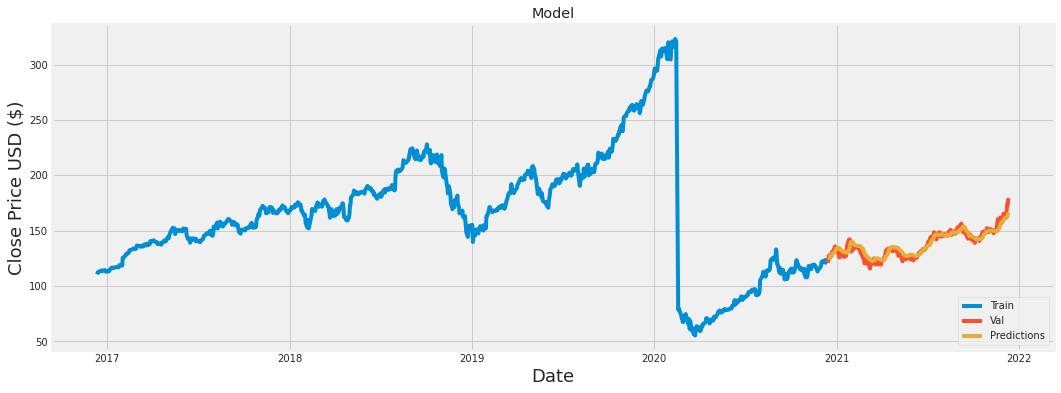

In [16]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [17]:
valid

,Close,Predictions
Date,,
2020-12-14,121.033852,125.449173
2020-12-15,127.096474,125.368378
2020-12-16,127.026901,125.694031
2020-12-17,127.911438,126.256287
2020-12-18,125.878983,127.010742
...,...,...
2021-12-06,165.320007,161.734299
2021-12-07,171.179993,162.073624
2021-12-08,175.080002,162.970703


In [20]:
model.save("LSTMmodel.h5")

In [22]:
data_aapl.to_csv('AAPL_5Y_data.csv')

In [26]:
from keras.models import load_model
loaded = load_model("LSTMmodel.h5")

In [28]:

loaded.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 128)           66560     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_4 (Dense)             (None, 25)                1625      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 60, 128)           66560     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_4 (Dense)             (None, 25)                1625      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________
